#  Glass Identification 

## Project Description

### The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

### The chemical compositions are measured as the weight percent in corresponding oxide.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
glass = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [90]:
glass.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Attribute Information-

### 1.	 Id number: 1 to 214
### 2.	 RI: refractive index
### 3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
### 4.	Mg: Magnesium
### 5.	Al: Aluminum
### 6.	Si: Silicon
### 7.	K: Potassium
### 8.	Ca: Calcium
### 9.	Ba: Barium
### 10.	Fe: Iron
### 11.	Type of glass: (class attribute)


In [91]:
glass.shape

(214, 11)

In [92]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [93]:
glass.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [94]:
glass.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [95]:
print(glass['Type of glass'].unique())

[1 2 3 5 6 7]


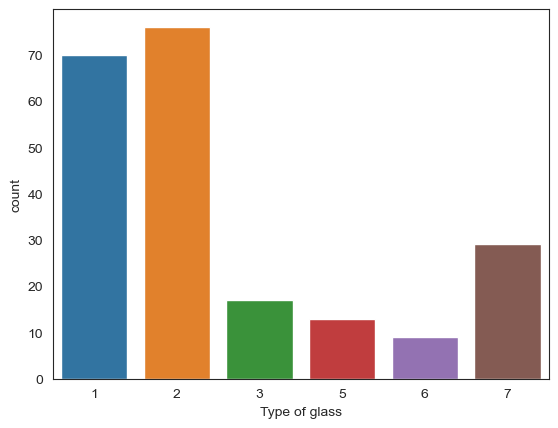

In [96]:
sns.set_style('white')
sns.countplot(x="Type of glass",data=glass);

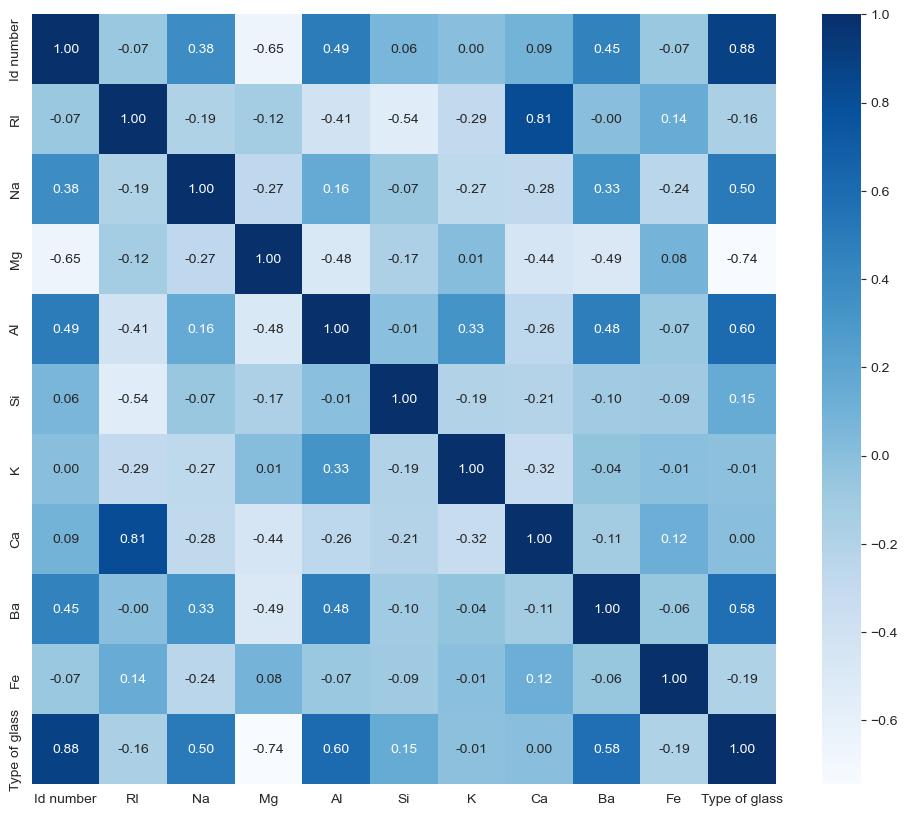

In [97]:
plt.figure(figsize=(12,10))
sns.heatmap(glass.corr(),annot=True,fmt='.2f',cmap='Blues',cbar=True);

In [98]:
df_1=glass[glass["Type of glass"]==1]["RI"]
df_2=glass[glass["Type of glass"]==2]["RI"]
df_3=glass[glass["Type of glass"]==3]["RI"]
df_5=glass[glass["Type of glass"]==5]["RI"]
df_6=glass[glass["Type of glass"]==6]["RI"]
df_7=glass[glass["Type of glass"]==7]["RI"]

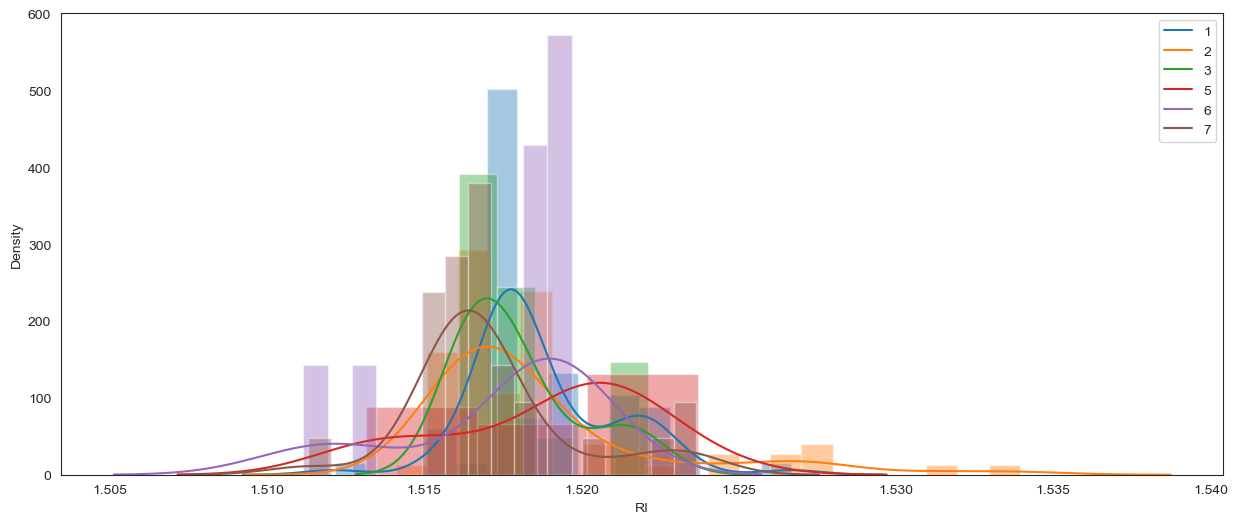

In [99]:
plt.figure(figsize=(15,6))
sns.set_style("white")
sns.distplot(df_1);
sns.distplot(df_2);
sns.distplot(df_3);
sns.distplot(df_5);
sns.distplot(df_6);
sns.distplot(df_7);
plt.legend(glass["Type of glass"].unique());

## spliting the data

In [100]:
x = glass.drop('Type of glass',axis=1)
y = glass['Type of glass']

In [101]:
# spliting the data into traing and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# model building

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(x_train,y_train)
lr_prediction = lr.predict(x_test)
accuracy = r2_score(lr_prediction,y_test)
print(accuracy)

0.9353089370340267


In [105]:
glass_type = pd.DataFrame()

In [106]:
glass_type['Id number'] = x_train['Id number']

In [107]:
glass_type.drop(glass_type.index[43:214],inplace = True)

In [108]:
glass_type['Type'] = lr_prediction

In [109]:
glass_type.loc[glass_type['Type'] <5, 'Type of glass'] = 'Window glass'
glass_type.loc[glass_type['Type'] >=5, 'Type of glass'] = 'Non Window glass'

# type of glass

In [110]:
glass_type.head()

,Id number,Type,Type of glass
79,80,0.527053,Window glass
161,162,6.959091,Non Window glass
109,110,0.927595,Window glass
127,128,6.723086,Non Window glass
95,96,2.915348,Window glass
